2048


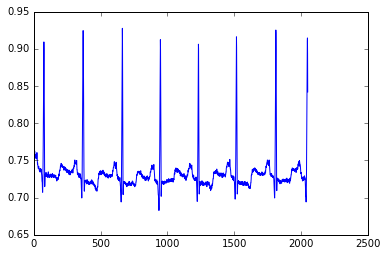

In [216]:
%matplotlib inline  

# import pyplot, plotting for python
import matplotlib.pyplot as plt
import math
import numpy as np 
file=open('Arry_data2.txt','r')
list=[]

for line in file:
    list.append(float(line.replace('\n','')))
signal=list[0:2048]
print len(signal)                
plt.plot(np.arange(2048),np.array(signal))
plt.show()                 

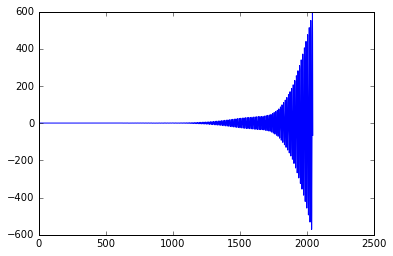

In [42]:
#basic filtering 
#step 1:
import scipy.signal as ss

Fs=360.0
b,a=ss.iirfilter(6,[(60/Fs)-0.001, (60/Fs)+0.001],btype='bandstop')
Out=ss.lfilter(b, a, signal)
plt.plot(Out)
plt.show() 

In [217]:
def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

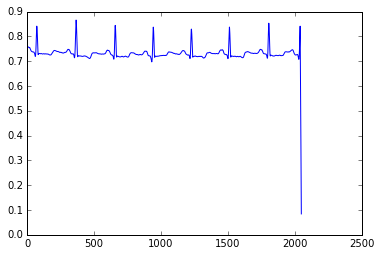

In [218]:
#print b,a
Out=runningMeanFast(signal,10)
plt.plot(Out)
plt.show()

0.781563353247
<type 'numpy.ndarray'>
[ 168  460  754 1038 1323 1606 1900 2135]


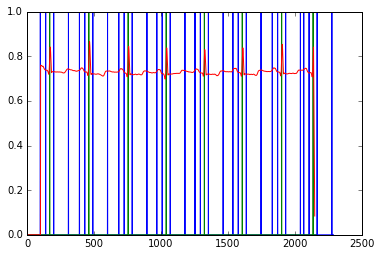

[  98  390  684  968 1253 1536 1830 2065]
[ 138  430  724 1008 1293 1576 1870 2105]
[ 168  460  754 1038 1323 1606 1900 2135]
[ 198  490  784 1068 1353 1636 1930 2165]
[ 308  600  894 1178 1463 1746 2040 2275]


In [219]:
signal=np.append(np.zeros(100,dtype=np.float),Out)
threshold=(np.mean(signal)+np.max(signal))/2
print threshold
position=np.where(signal>threshold)
print type(position[0])
#print len(position[0])
aaa=np.zeros((len(signal))+10, dtype=np.float)
aaa[position[0]]=1
cp=position[0][0]
i=1
for i in np.arange(1,position[0].size):    
    diff=abs(cp-position[0][i])    
    if diff < 50:
        #print cp,position[0][i],diff
        aaa[position[0][i]]=0
    cp=position[0][i]

    
position=np.where(aaa==1)
print position[0]

r=[position[0]-30,position[0]+30]
r2=[position[0]-70,position[0]+140]
bb=np.zeros((len(signal))+140, dtype=np.float)
bb[r[0]]=1
bb[r[1]]=1
bb[r2[0]]=1
bb[r2[1]]=1
plt.plot(bb) 
plt.plot(aaa)
plt.plot(signal)
plt.show()

print r2[0]
print r[0]
print position[0]
print r[1]
print r2[1]
i=0




In [220]:
signal=np.append(signal,np.zeros(140,dtype=np.float))
print len(signal)
signal = signal.tolist()
type(signal)

2288


list

In [221]:
signal[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [234]:
i=0
Q_index=np.array([])
S_index=np.array([])
P_index=np.array([])
T_index=np.array([])

for i in np.arange(0,position[0].size):
    #print r[0][i],position[0][i],signal.index(min(signal[r[0][i]:position[0][i]]))
    Q_index=np.append(Q_index,int(r[0][i]+signal[r[0][i]:position[0][i]].index(min(signal[r[0][i]:position[0][i]]))))
    S_index=np.append(S_index,int(position[0][i]+signal[position[0][i]:r[1][i]].index(min(signal[position[0][i]:r[1][i]]))))
    P_index=np.append(P_index,int(r2[0][i]+signal[r2[0][i]:r[0][i]].index(min(signal[r2[0][i]:r[0][i]]))))
    T_index=np.append(T_index,int(r[1][i]+signal[r[1][i]:r2[1][i]].index(min(signal[r[1][i]:r2[1][i]]))))
print Q_index
print S_index
print P_index
print T_index




[  161.   453.   747.  1030.  1315.  1599.  1893.  2128.]
[  182.   477.   768.  1052.  1337.  1620.  1915.  2148.]
[   98.   429.   723.  1007.  1292.  1575.  1867.  2104.]
[  272.   565.   854.  1069.  1417.  1709.  1939.  2165.]


In [229]:
print len(signal)
np.zeros(np.zeros(1,2288))

2288


TypeError: data type not understood

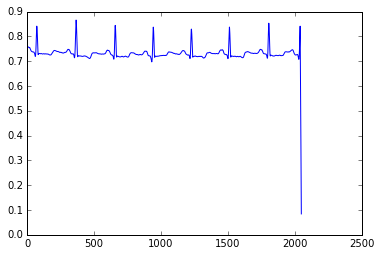

In [184]:
signal.size
plt.plot(Out)
plt.show()

In [175]:
print min(signal[1777:1807])
signal[1777:1807].index(min(signal[1777:1807]))

0.6994661


23

In [153]:
position[0].size

8

In [155]:
np.arange(0,position[0].size)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [104]:
range(1,len(position))


TypeError: 'list' object is not callable

In [ ]:
plt.plot(aaa)    
plt.plot(Out)
plt.show()